<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/ISLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=a1837e26bcb8276b79369fe034df11ba177181b157e3d80e8349cabfef9819ae
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import ModelSpec as MS, poly
from ISLP.models import ModelSpec as MS, poly

from sklearn.model_selection import train_test_split
b0 = 50
b1 = 20
b2 = 0.07
b3 = 35
b4 = 0.01
b5 = -10

arr = np.array([b0, b1, b2, b3, b4, b5])
val = np.array([1, 4, 110, 1, 4 * 110, 1 * 4])
np.sum(arr * val)

np.float64(137.1)

# Pregunta 4, comparacion de modelos con diferentes tipos de regresion


In [ ]:
m

In [ ]:
#Generando al data
np.random.seed(7)
n = 10000
x = np.linspace(0, 100, n)
intercepto_real = 10
pendiente_real = 7
y = intercepto_real + pendiente_real * x + np.random.normal(0, 100, n)

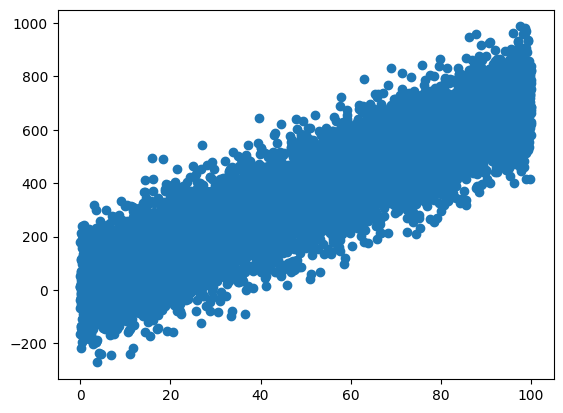

In [ ]:
# graficando
plt.scatter(x, y)

In [ ]:
data = pd.DataFrame({"x": x, "y": y})

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
train_data.columns

Index(['x', 'y'], dtype='object')

In [ ]:

# Datos lineales (relación verdadera lineal)
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 + 2* x + 3*x ** 2 + np.random.normal(0, 3, 100)
data = pd.DataFrame({"x": x, "y": y})

# División train/test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Tres diseños: lineal, cuadrático y cúbico
designs = [
    MS(['x']),
    MS([poly("x", degree=2)]),
    MS([poly("x", degree=3)])
]

for ms in designs:
    # Ajustar con train
    X_train = ms.fit_transform(train_data)
    model = sm.OLS(train_data["y"], X_train).fit()

    # Transformar test
    X_test = ms.transform(test_data)
    pred = model.predict(X_test)

    RSS = np.sum((pred - test_data["y"]) ** 2)
    print(f"{ms}:")
    print(f"  Train R² = {model.rsquared:.4f}")
    print(f"  Test RSS = {RSS:.4f}\n")

ModelSpec(terms=['x']):
  Train R² = 0.9287
  Test RSS = 15922.2816

ModelSpec(terms=[Feature(variables=('x',), name='poly(x, degree=2)', encoder=Poly(degree=2), use_transform=True, pure_columns=False, override_encoder_colnames=True)]):
  Train R² = 0.9991
  Test RSS = 231.3026

ModelSpec(terms=[Feature(variables=('x',), name='poly(x, degree=3)', encoder=Poly(degree=3), use_transform=True, pure_columns=False, override_encoder_colnames=True)]):
  Train R² = 0.9991
  Test RSS = 235.9498



Comparación de modelos:

Modelo       RSS_train    RSS_test    R2_train     R2_test
Grado 1         231.89       94.38       0.916       0.908
Grado 2         231.75       93.69       0.916       0.908
Grado 3         220.48       88.99       0.921       0.913


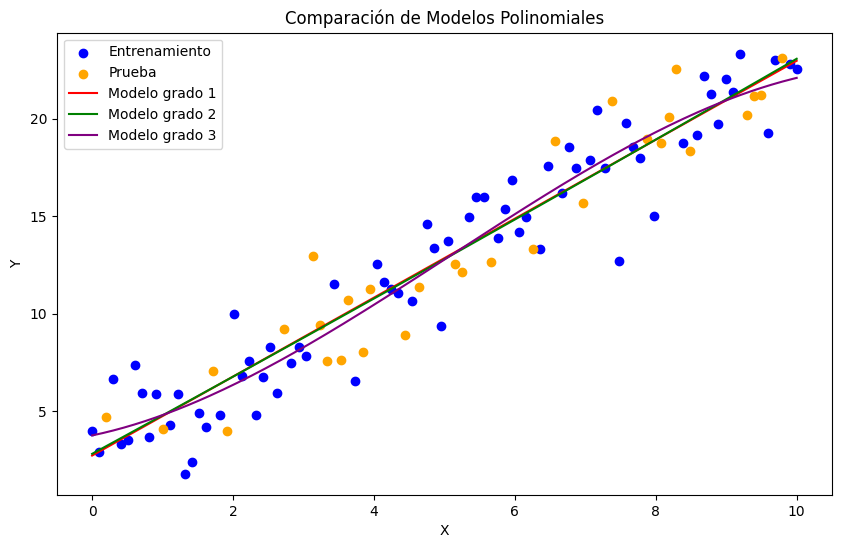

In [ ]:
# ============================================
# 📊 Comparación de modelos: lineal, cuadrático y cúbico
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# -----------------------------
# 1️⃣ Generar datos simulados
# -----------------------------
np.random.seed(42)
n = 100
X = np.linspace(0, 10, n).reshape(-1, 1)

# Relación REAL: lineal
y_true = 3 + 2 * X.flatten() + np.random.normal(0, 2, n)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=1)

# -----------------------------
# 2️⃣ Función para ajustar modelo polinomial
# -----------------------------
def fit_poly_model(degree, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    RSS_train = np.sum((y_train - y_pred_train)**2)
    RSS_test = np.sum((y_test - y_pred_test)**2)
    R2_train = r2_score(y_train, y_pred_train)
    R2_test = r2_score(y_test, y_pred_test)

    return model, RSS_train, RSS_test, R2_train, R2_test

# -----------------------------
# 3️⃣ Ajustar modelos
# -----------------------------
degrees = [1, 2, 3]
results = {}

for d in degrees:
    model, RSS_train, RSS_test, R2_train, R2_test = fit_poly_model(d, X_train, y_train, X_test, y_test)
    results[d] = (RSS_train, RSS_test, R2_train, R2_test)

# -----------------------------
# 4️⃣ Mostrar resultados
# -----------------------------
print("Comparación de modelos:\n")
print(f"{'Modelo':<10}{'RSS_train':>12}{'RSS_test':>12}{'R2_train':>12}{'R2_test':>12}")
for d in degrees:
    RSS_train, RSS_test, R2_train, R2_test = results[d]
    print(f"{'Grado '+str(d):<10}{RSS_train:>12.2f}{RSS_test:>12.2f}{R2_train:>12.3f}{R2_test:>12.3f}")

# -----------------------------
# 5️⃣ Visualización
# -----------------------------
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color="blue", label="Entrenamiento")
plt.scatter(X_test, y_test, color="orange", label="Prueba")

colors = ["red", "green", "purple"]
for d, color in zip(degrees, colors):
    poly = PolynomialFeatures(d)
    X_plot_poly = poly.fit_transform(X_plot)
    y_plot = LinearRegression().fit(poly.fit_transform(X_train), y_train).predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color=color, label=f"Modelo grado {d}")

plt.title("Comparación de Modelos Polinomiales")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


# Applied Part

## Ejercicio 8

### Cargado de datos

In [ ]:
auto = load_data("Auto")

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


### matrz de caracteristicas X

In [ ]:
X = auto["horsepower"]
Y = auto["mpg"]

In [ ]:
lineal_design = MS(["horsepower"])
lineal_design = lineal_design.fit(auto)
train_x = lineal_design.transform(auto)
train_x

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140
...,...,...
ford mustang gl,1.0,86
vw pickup,1.0,52
dodge rampage,1.0,84


### aplicacion del modelo de regresion lineal

In [ ]:
model = sm.OLS(Y, train_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        16:48:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ploteo de la relacion

In [ ]:
def line(ax, slope, intercept):
  xlim = ax.get_xlim()
  ylim = [slope * xlim[0] + intercept, slope * xlim[1] + intercept]
  ax.plot(xlim, ylim, color="black")


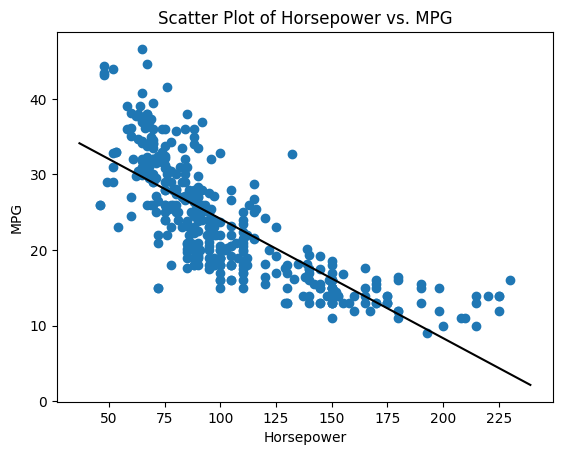

In [ ]:
fig, ax = plt.subplots()

ax.scatter(train_x["horsepower"], Y)
line(ax, model.params["horsepower"], model.params["intercept"])
plt.title("Scatter Plot of Horsepower vs. MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

### modelo polinomio de grado 2

In [ ]:
design = MS([poly("horsepower", degree=2)])
design = design.fit(auto)
train_x = design.transform(auto)
model2 = sm.OLS(Y, train_x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           5.40e-99
Time:                        16:48:25   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        23.4459      0.221    106.130      0.000      23.012      23.880
poly(horsepower, degree=2)[0]  -120.1377      4.374    -27.467      0.000    -128.737    -111.538
poly(horsepower, degree=2)[1]    44.0895      4.374     10.080      0.000      35.490      52.689
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_x = np.arange(X.min(), X.max(), 10)
pred_x = pd.DataFrame({"horsepower": pred_x})
new_data_x = design.transform(pred_x)
new_data_x

,intercept,"poly(horsepower, degree=2)[0]","poly(horsepower, degree=2)[1]"
0,1.0,-0.076821,0.122119
1,1.0,-0.063682,0.080651
2,1.0,-0.050544,0.044766
3,1.0,-0.037405,0.014462
4,1.0,-0.024266,-0.010260
5,1.0,-0.011128,-0.029400
6,1.0,0.002011,-0.042958
7,1.0,0.015150,-0.050934
8,1.0,0.028288,-0.053328
9,1.0,0.041427,-0.050141


In [ ]:
predicted_y = model2.predict(new_data_x)
predicted_y

,0
0,38.059191
1,34.652442
2,31.491799
3,28.577264
4,25.908837
5,23.486516
6,21.310303
7,19.380196
8,17.696197
9,16.258306


Text(0.5, 1.0, 'Scatter Plot of Horsepower vs. MPG')

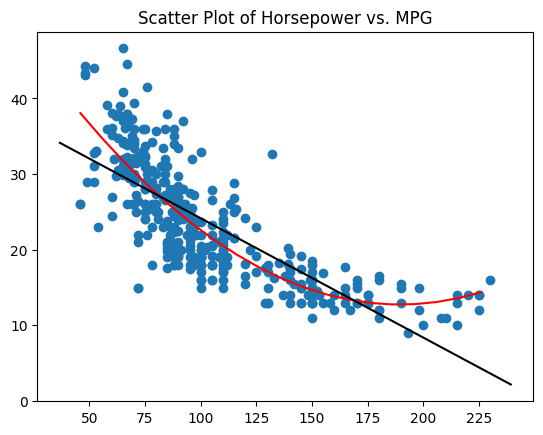

In [ ]:
# Graficando las predicciones que es ppolinomio de grado 2
fig, ax = plt.subplots()
ax.scatter(auto["horsepower"], Y)
ax.plot(pred_x, predicted_y, color="red")
line(ax, model.params["horsepower"], model.params["intercept"])
plt.title("Scatter Plot of Horsepower vs. MPG")

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           5.40e-99
Time:                        16:49:18   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        23.4459      0.221    106.130      0.000      23.012      23.880
poly(horsepower, degree=2)[0]  -120.1377      4.374    -27.467      0.000    -128.737    -111.538
poly(horsepower, degree=2)[1]    44.0895      4.374     10.080      0.000      35.490      52.689
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        16:49:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Respuetas


#### (a)

i) si existe relacion significativa entre el preductor "Horsepower" y la repuesta que es "mpg".

ii) con un valor de 0.606 de r2 podemos decir que la relacion es relativamente fuerte. Sin embargo el modelo no es bueno debido a que graficamente los datos siguen una forma mas compleja.

iii) la relacion es positiva entre las variables, por cada incremento de 1 unidad en el "horsepower" tendremos una respuesta positiva de 39 unidades mas en la variable dependiente "mpg"

In [ ]:
# iv
new_data = pd.DataFrame({"horsepower": [98]})
point = lineal_design.transform(new_data)
model.predict(point)


,0
0,24.467077


#### b)

#### calculando los residuos


In [ ]:
model.fittedvalues

,0
name,
chevrolet chevelle malibu,19.416046
buick skylark 320,13.891480
plymouth satellite,16.259151
amc rebel sst,16.259151
ford torino,17.837598
...,...
ford mustang gl,26.361214
vw pickup,31.727935
dodge rampage,26.676903


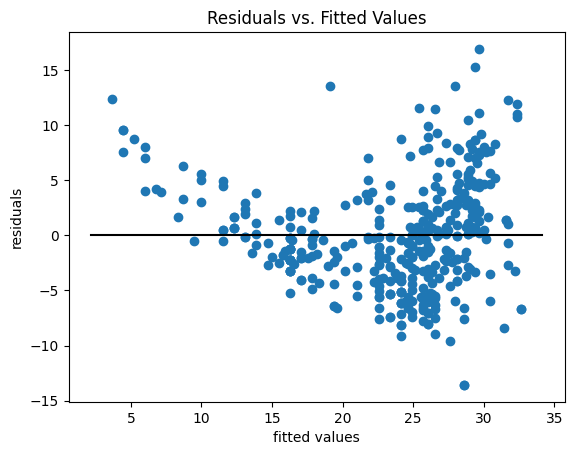

In [ ]:
fig, ax = plt.subplots()
ax.scatter(model.fittedvalues, model.resid)
ax.plot(ax.get_xlim(), [0, 0], color="black")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

podemos apreciar que los errores a simple vista tienen una tendencia a patron. Para lo cual haremos una revision con la regresion los fitted values y la respuesta de los residuals. Nuestro objetivo es verificar si existe o no linealidad en el modelo.

#### ajustando la linea de regresion de los fitted values con lkos residuals

In [ ]:
data = pd.DataFrame({"resid": model2.resid,
                     "fitted": model2.fittedvalues})
resid_design = MS([poly("fitted", degree=2)])
resid_design = resid_design.fit(data)
train_x = resid_design.transform(data)
model3 = sm.OLS(model.resid, train_x).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     25.68
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           3.34e-11
Time:                        16:49:33   Log-Likelihood:                -1154.4
No. Observations:                 392   AIC:                             2315.
Df Residuals:                     389   BIC:                             2327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                 -1.991e-14      0.233  -8.54e-14      1.000      -0.458       0.458
poly(fitted, degree=2)[0]    15.1899      4.617      3.290      0.001       6.113      24.267
poly(fitted, degree=2)[1]    29.3938      4.617      6.367      0.000      20.317      38.471
==============================================================================
Omnibus:                       13.055   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.299
Skew:                           0.235   Prob(JB):                     3.91e-05
Kurtosis:                       4.011   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data_fitted = np.arange(model2.fittedvalues.min(), model2.fittedvalues.max(), 1)
data_fitted = pd.DataFrame({"fitted": data_fitted})
new_data_fitted = resid_design.transform(data_fitted)
predicted_resid = model3.predict(new_data_fitted)

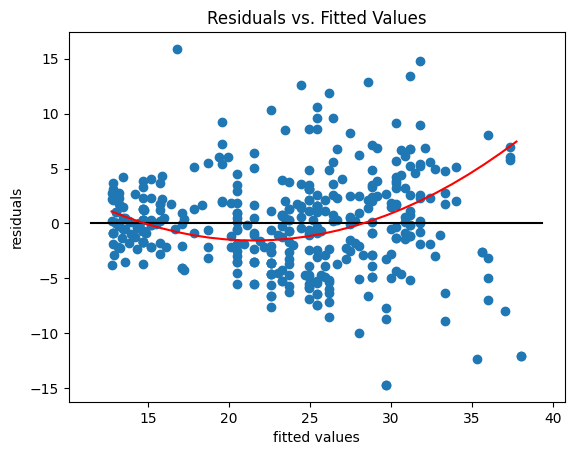

In [ ]:
fig, ax = plt.subplots()
ax.scatter(model2.fittedvalues, model2.resid)
ax.plot(ax.get_xlim(), [0, 0], color="black")
ax.plot(data_fitted, predicted_resid, color="red")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

Con el grafico de los residuos podemos decir que el modelo mejora debido a que existe una relacion no lineal entre los datos. con esto podemos decir que el modelo cuadratico mejora las mediciones del modelo.

## pregunta 9

In [ ]:
auto = load_data("Auto")

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


In [ ]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

### A)


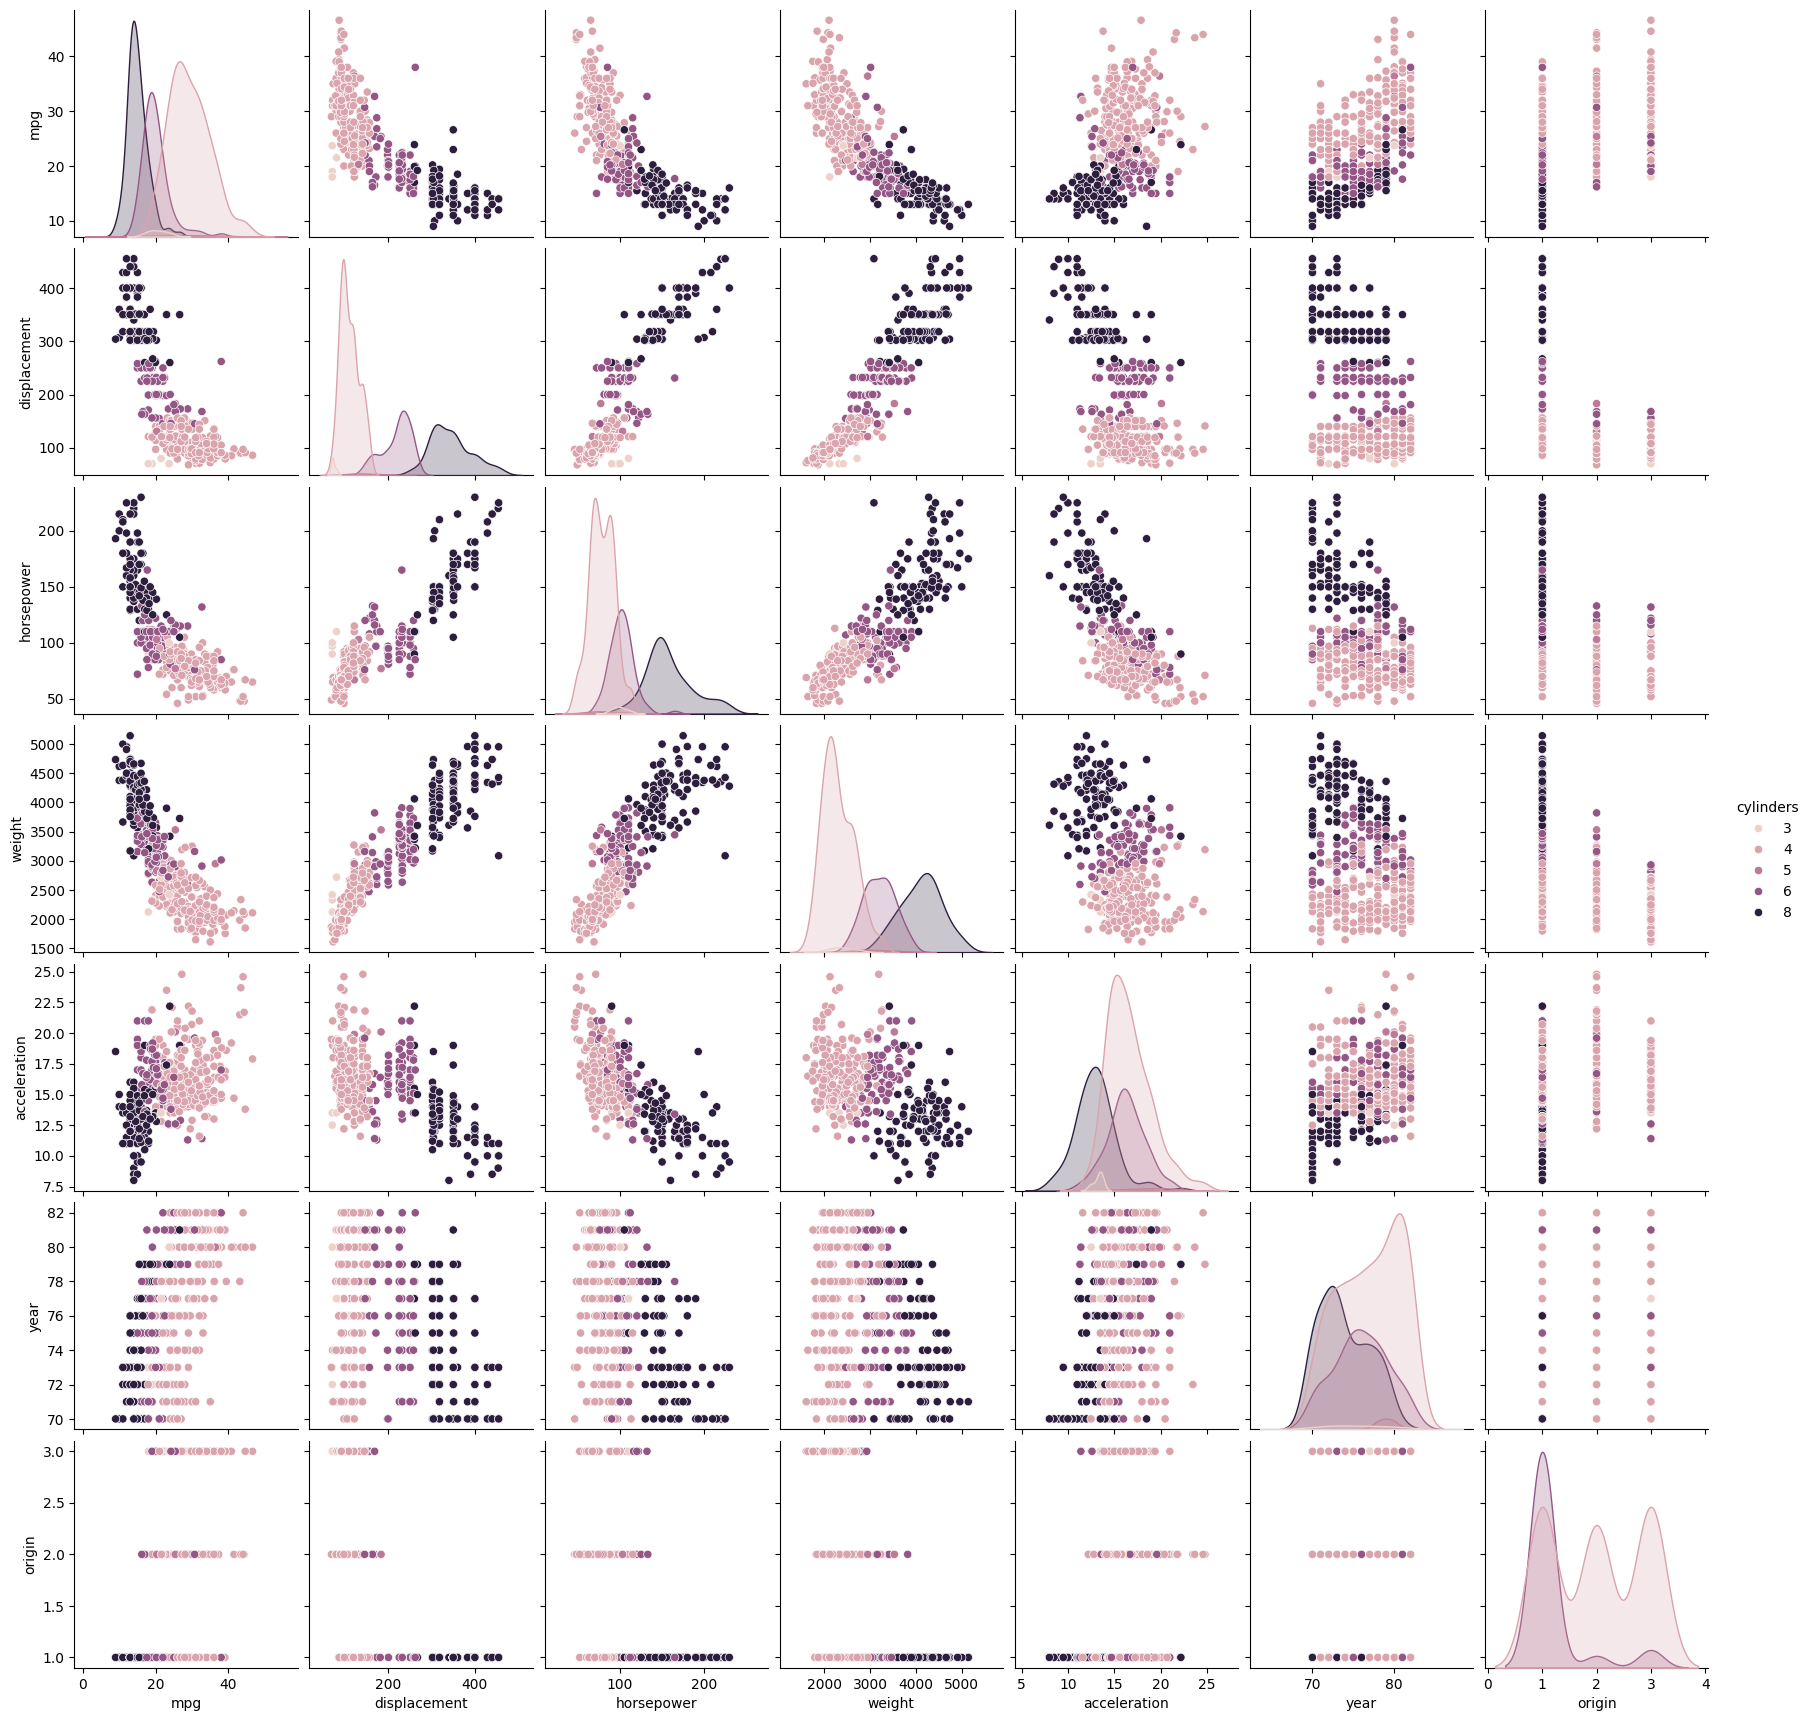

In [ ]:
import seaborn as sns
sns.pairplot(auto, hue="cylinders")

### B)

In [ ]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
X = auto[auto.columns.drop("mpg")]
y = auto["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(313, 7)

### analisis de variables (cylinder)

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 35.7+ KB


In [ ]:
auto.origin.value_counts()


,count
origin,
1,245
3,79
2,68


In [ ]:
auto["cylinders"].value_counts()

,count
cylinders,
4,199
8,103
6,83
3,4
5,3


In [ ]:
auto.nunique()

,0
mpg,127
cylinders,5
displacement,81
horsepower,93
weight,346
acceleration,95
year,13
origin,3


In [ ]:
cat_var = ["origin"]
X_train = pd.get_dummies(X_train, columns=cat_var, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_var, drop_first=True)
X_train = X_train.astype(float)
y_train = y_train.astype(float)


In [ ]:
# adding intercePT
X_train = sm.add_constant(X_train)
X_test= sm.add_constant(X_test)

In [ ]:
model_multiple = sm.OLS(y_train, X_train).fit()
print(model_multiple.summary())
#

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          1.20e-111
Time:                        23:39:28   Log-Likelihood:                -816.67
No. Observations:                 313   AIC:                             1651.
Df Residuals:                     304   BIC:                             1685.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.3319      5.446     -3.550   

### analizando colinealidad

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# X = tus variables independientes (sin la dependiente)
X = X_train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin_2', 'origin_3']]
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable         VIF
0         const  834.069241
1     cylinders   11.121111
2  displacement   22.553848
3    horsepower    9.930451
4        weight   10.486526
5  acceleration    2.682995
6          year    1.348005
7      origin_2    1.571200
8      origin_3    1.736818


In [ ]:
# eliminando variables repetidas que p=roducen alto VIF
colineales = ["horsepower", "cylinders", "displacement"]
X_train = X_train.drop(colineales, axis=1)
X_test = X_test.drop(colineales, axis=1)

In [ ]:
X_train.corr()

,const,weight,acceleration,year,origin_2,origin_3
const,NaN,NaN,NaN,NaN,NaN,NaN
weight,NaN,1.000000,-0.392906,-0.328623,-0.257206,-0.466682
acceleration,NaN,-0.392906,1.000000,0.302437,0.183057,0.133746
year,NaN,-0.328623,0.302437,1.000000,-0.048850,0.191089
origin_2,NaN,-0.257206,0.183057,-0.048850,1.000000,-0.213648
origin_3,NaN,-0.466682,0.133746,0.191089,-0.213648,1.000000


In [ ]:
X_train = X_train.drop("weight", axis=1)
X_test = X_test.drop("weight", axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

X = X_train.copy()
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable         VIF
0         const  457.074760
1  acceleration    1.170162
2          year    1.135867
3      origin_2    1.106713
4      origin_3    1.103708


In [ ]:
import statsmodels.api as sm

model_multiple = sm.OLS(y_train, X_train).fit()
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           1.64e-62
Time:                        23:29:42   Log-Likelihood:                -943.57
No. Observations:                 313   AIC:                             1897.
Df Residuals:                     308   BIC:                             1916.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6168      6.008    -10.922   

#### Anova

In [ ]:
from statsmodels.stats.anova import anova_lm

anova_lm(model_multiple, type=2)

AttributeError: 'PandasData' object has no attribute 'design_info'

i) si hay relacion entre todas las variables tomadas en cuenta dado que los valores de p son menos a 0.05 que es nuestro nivel de signoficancia.

ii) los predictors que son significativos estadsiticamente dado su nivel de significancia en 0.05 y un valor de p menor a este son:
- displacement
- weight
- year
- origin

iii) Nos dice que mientras mas reciente sea el auto, tendremos un valor mas alto de los mpg. exactamnente por cada 1 unidad de cambio en year, habra unincremento de 0.75 en el mpg manteniendo a los demas factores constantes.

### d)Graficos de diagnistico

<Axes: ylabel='Density'>

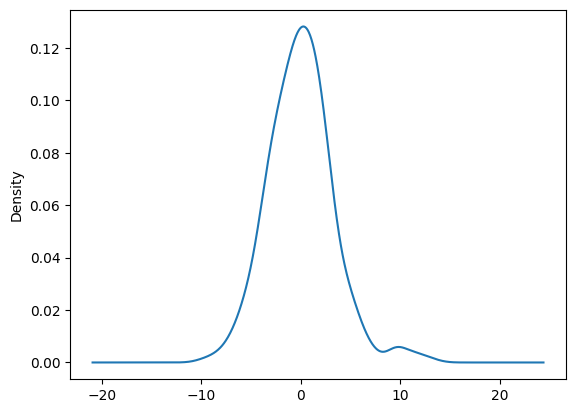

In [ ]:
model_multiple.resid.plot(kind="kde")

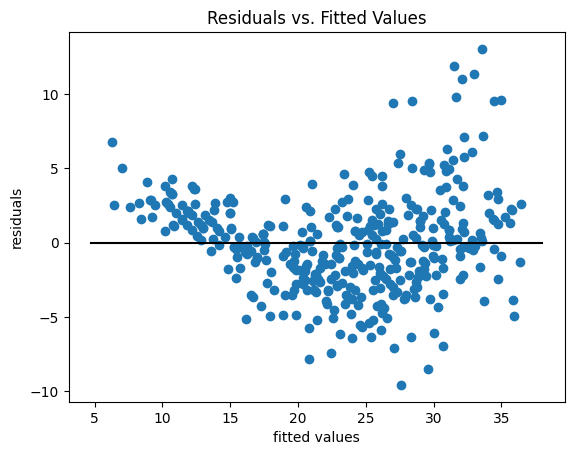

In [ ]:
fig, ax = plt.subplots()
ax.scatter(model_multiple.fittedvalues, model_multiple.resid)
ax.plot(ax.get_xlim(), [0, 0], color="black")
ax.set_title("Residuals vs. Fitted Values")
ax.set_xlabel("fitted values")
ax.set_ylabel("residuals")
plt.show()

<Axes: >

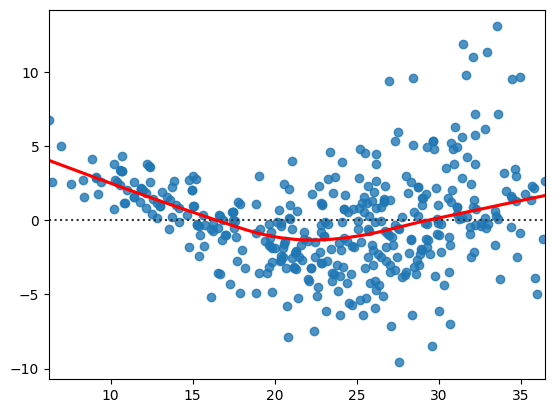

In [ ]:
sns.residplot(x=model_multiple.fittedvalues, y=model_multiple.resid, lowess=True, line_kws={"color": "red"})

### Evaluacion con los datos de testeo

In [ ]:
y_pred = model_multiple.predict(X_test)

In [ ]:
from sklearn import metrics
r_squared_test = metrics.r2_score(y_test, y_pred)
r_squared_test

0.5475557373867396

In [ ]:
mape = metrics.mean_absolute_error(y_test, y_pred)
mape

3.808143406079216

In [ ]:
auto["displacement"] * auto["weight"]
X_train

,const,acceleration,year,origin_2,origin_3
name,,,,,
dodge aspen,1.0,18.7,78.0,0.0,0.0
capri ii,1.0,14.9,76.0,0.0,0.0
ford pinto,1.0,14.5,75.0,0.0,0.0
plymouth fury iii,1.0,13.5,72.0,0.0,0.0
plymouth champ,1.0,16.4,81.0,0.0,0.0
...,...,...,...,...,...
amc matador (sw),1.0,12.5,72.0,0.0,0.0
amc gremlin,1.0,15.0,73.0,0.0,0.0
oldsmobile starfire sx,1.0,17.6,78.0,0.0,0.0


### Algunas interacciones


In [ ]:
auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
valid_cols = ["acceleration", "year", "origin"]
valid_X = auto[valid_cols].copy()
valid_X["cylinders_displacement"] = auto["cylinders"] * auto["displacement"]
valid_X["cylinders_horsepower"] = auto["cylinders"] * auto["horsepower"]
valid_X["weight_cylinders"] = auto["weight"] * auto["cylinders"]
valid_X

,acceleration,year,origin,cylinders_displacement,cylinders_horsepower,weight_cylinders
name,,,,,,
chevrolet chevelle malibu,12.0,70,1,2456.0,1040,28032
buick skylark 320,11.5,70,1,2800.0,1320,29544
plymouth satellite,11.0,70,1,2544.0,1200,27488
amc rebel sst,12.0,70,1,2432.0,1200,27464
ford torino,10.5,70,1,2416.0,1120,27592
...,...,...,...,...,...,...
ford mustang gl,15.6,82,1,560.0,344,11160
vw pickup,24.6,82,2,388.0,208,8520
dodge rampage,11.6,82,1,540.0,336,9180


In [ ]:
valid_X = pd.get_dummies(valid_X, columns=["origin"], drop_first=True)

In [ ]:
valid_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   acceleration            392 non-null    float64
 1   year                    392 non-null    int64  
 2   cylinders_displacement  392 non-null    float64
 3   cylinders_horsepower    392 non-null    int64  
 4   weight_cylinders        392 non-null    int64  
 5   origin_2                392 non-null    bool   
 6   origin_3                392 non-null    bool   
dtypes: bool(2), float64(2), int64(3)
memory usage: 19.1+ KB


In [ ]:
valid_X.origin_2 = valid_X.origin_2.astype(float)
valid_X.origin_3 = valid_X.origin_3.astype(float)

In [ ]:
y = auto["mpg"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(valid_X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [ ]:
# reentrenando el modelo

model_int_disp_weig = sm.OLS(y_train, X_train).fit()
print(model_int_disp_weig.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           3.36e-99
Time:                        01:30:53   Log-Likelihood:                -848.99
No. Observations:                 313   AIC:                             1714.
Df Residuals:                     305   BIC:                             1744.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -31

<Axes: >

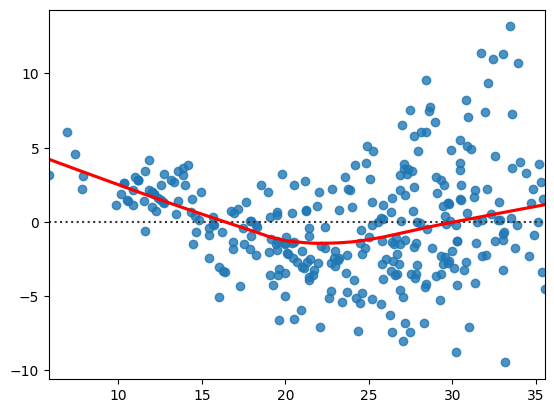

In [ ]:
import seaborn as sns

sns.residplot(x=model_int_disp_weig.fittedvalues, y=model_int_disp_weig.resid, lowess=True, line_kws={"color": "red"})

### agregando algunas transformaciones en las variables

In [ ]:
valid_X.columns

Index(['acceleration', 'year', 'cylinders_displacement',
       'cylinders_horsepower', 'weight_cylinders', 'origin_2', 'origin_3'],
      dtype='object')

In [ ]:
valid_X = valid_X.drop("cylinders_horsepower", axis=1)

In [ ]:
valid_X.corr()

,acceleration,year,cylinders_displacement,weight_cylinders,origin_2,origin_3
acceleration,1.000000,0.290316,-0.562173,-0.490488,0.208298,0.115020
year,0.290316,1.000000,-0.378446,-0.348279,-0.037745,0.199841
cylinders_displacement,-0.562173,-0.378446,1.000000,0.975933,-0.353357,-0.404001
weight_cylinders,-0.490488,-0.348279,0.975933,1.000000,-0.328674,-0.412986
origin_2,0.208298,-0.037745,-0.353357,-0.328674,1.000000,-0.230157
origin_3,0.115020,0.199841,-0.404001,-0.412986,-0.230157,1.000000


In [ ]:
valid_X = valid_X.drop("cylinders_displacement", axis=1)

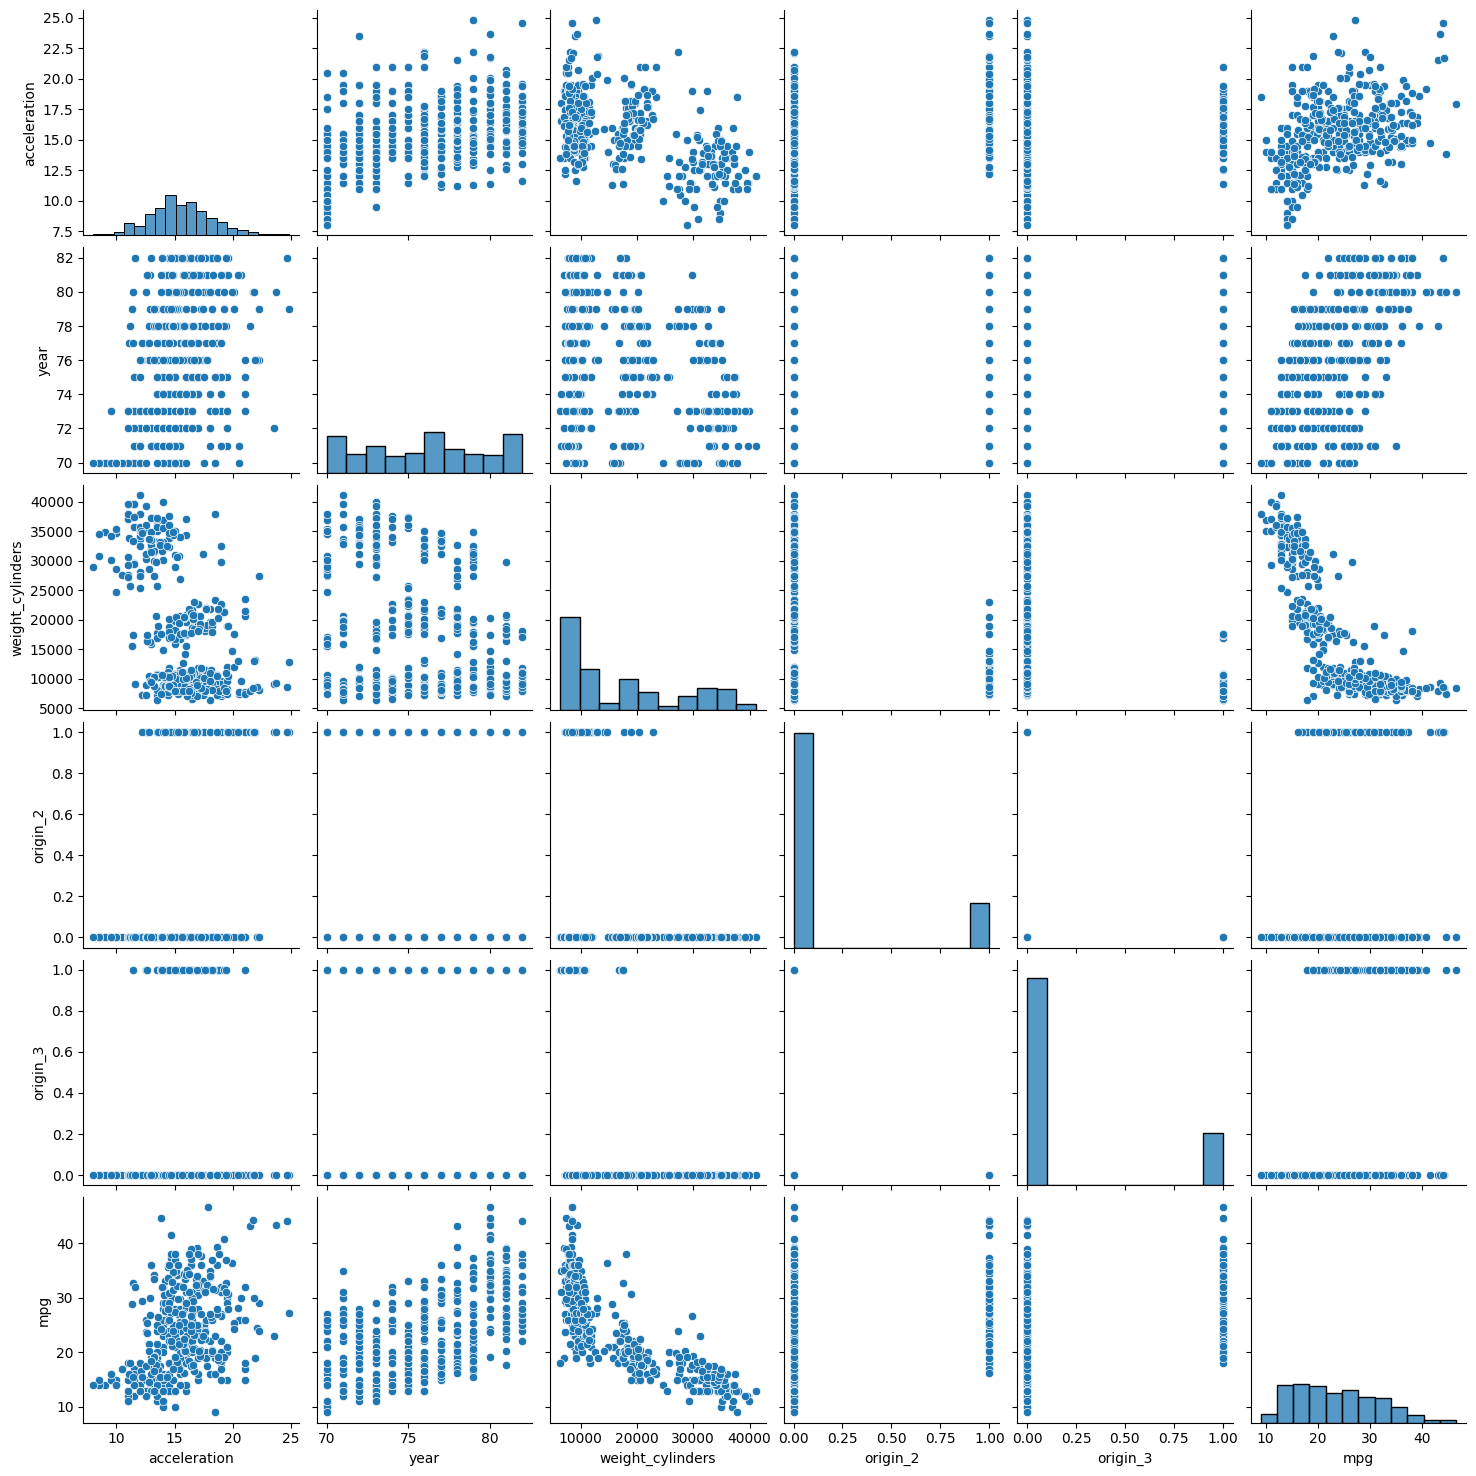

In [ ]:
df_graph = valid_X.copy()
df_graph["mpg"] = y
sns.pairplot(df_graph)

In [ ]:
valid_X["weight_cylinders"] = valid_X["weight_cylinders"] * valid_X["weight_cylinders"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(valid_X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
model_squared = sm.OLS(y_train, X_train).fit()
print(model_squared.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     173.9
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.60e-87
Time:                        02:04:38   Log-Likelihood:                -882.55
No. Observations:                 313   AIC:                             1777.
Df Residuals:                     307   BIC:                             1800.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -35.5194      5.541  

### aplicando un modelo cuadratico

In [ ]:
X = auto["horsepower"]
X

,horsepower
name,
chevrolet chevelle malibu,130
buick skylark 320,165
plymouth satellite,150
amc rebel sst,150
ford torino,140
...,...
ford mustang gl,86
vw pickup,52
dodge rampage,84


In [ ]:
y = auto["mpg"]
y

,mpg
name,
chevrolet chevelle malibu,18.0
buick skylark 320,15.0
plymouth satellite,18.0
amc rebel sst,16.0
ford torino,17.0
...,...
ford mustang gl,27.0
vw pickup,44.0
dodge rampage,32.0


In [ ]:
X = sm.add_constant(X)
lineal_model = sm.OLS(y, X).fit()

In [ ]:
print(lineal_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        02:16:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [ ]:
# modelo cuadratico
X["horsepower_squared"] = X["horsepower"] ** 2
X

,const,horsepower,horsepower_squared
name,,,
chevrolet chevelle malibu,1.0,130,16900
buick skylark 320,1.0,165,27225
plymouth satellite,1.0,150,22500
amc rebel sst,1.0,150,22500
ford torino,1.0,140,19600
...,...,...,...
ford mustang gl,1.0,86,7396
vw pickup,1.0,52,2704
dodge rampage,1.0,84,7056


In [ ]:
model_squared = sm.OLS(y, X).fit()
print(model_squared.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           5.40e-99
Time:                        02:22:08   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.9001      1

In [ ]:
data = np.arange(X["horsepower"].min(), X["horsepower"].max(), 1)
data = pd.DataFrame({"horsepower": data})
data = sm.add_constant(data)
data["horsepower_squared"] = data["horsepower"] ** 2
data

,const,horsepower,horsepower_squared
0,1.0,46,2116
1,1.0,47,2209
2,1.0,48,2304
3,1.0,49,2401
4,1.0,50,2500
...,...,...,...
179,1.0,225,50625
180,1.0,226,51076
181,1.0,227,51529
182,1.0,228,51984


In [ ]:
y_hat = model_squared.predict(data)
y_hat

,0
0,38.059191
1,37.707441
2,37.358153
3,37.011325
4,36.666958
...,...
179,14.303323
180,14.392105
181,14.483348
182,14.577053


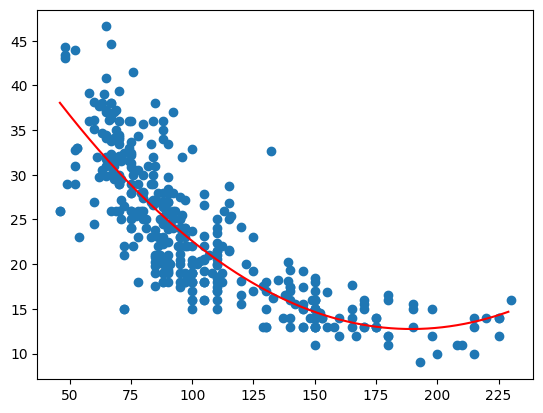

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X["horsepower"], y)
ax.plot(data["horsepower"], y_hat, color="red")


In [ ]:
X["horsepower_log"] = np.log(X["horsepower"])
X

,const,horsepower,horsepower_squared,horsepower_log
name,,,,
chevrolet chevelle malibu,1.0,130,16900,4.867534
buick skylark 320,1.0,165,27225,5.105945
plymouth satellite,1.0,150,22500,5.010635
amc rebel sst,1.0,150,22500,5.010635
ford torino,1.0,140,19600,4.941642
...,...,...,...,...
ford mustang gl,1.0,86,7396,4.454347
vw pickup,1.0,52,2704,3.951244
dodge rampage,1.0,84,7056,4.430817


In [ ]:
model_squared_log = sm.OLS(y, X).fit()
print(model_squared_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     284.7
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           1.24e-97
Time:                        02:34:35   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 64.2952     36

In [ ]:
data = np.arange(X["horsepower"].min(), X["horsepower"].max(), 1)
data = pd.DataFrame({"horsepower": data})
data = sm.add_constant(data)
data["horsepower_squared"] = data["horsepower"] ** 2
data["horsepower_log"] = np.log(data["horsepower"])

y_hat = model_squared_log.predict(data)

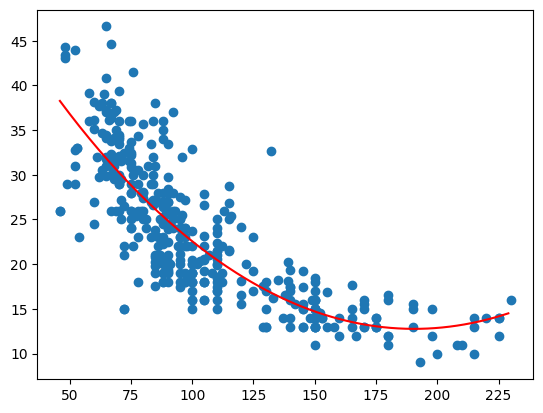

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X["horsepower"], y)
ax.plot(data["horsepower"], y_hat, color="red")


In [ ]:
X["horsepower_root"] = np.sqrt(X["horsepower"])
X

,const,horsepower,horsepower_squared,horsepower_log,horsepower_root
name,,,,,
chevrolet chevelle malibu,1.0,130,16900,4.867534,11.401754
buick skylark 320,1.0,165,27225,5.105945,12.845233
plymouth satellite,1.0,150,22500,5.010635,12.247449
amc rebel sst,1.0,150,22500,5.010635,12.247449
ford torino,1.0,140,19600,4.941642,11.832160
...,...,...,...,...,...
ford mustang gl,1.0,86,7396,4.454347,9.273618
vw pickup,1.0,52,2704,3.951244,7.211103
dodge rampage,1.0,84,7056,4.430817,9.165151


In [ ]:
model_sqrt_log_root = sm.OLS(y, X).fit()
print(model_sqrt_log_root.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           1.99e-98
Time:                        02:39:07   Log-Likelihood:                -1128.3
No. Observations:                 392   AIC:                             2267.
Df Residuals:                     387   BIC:                             2287.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -683.8915    243

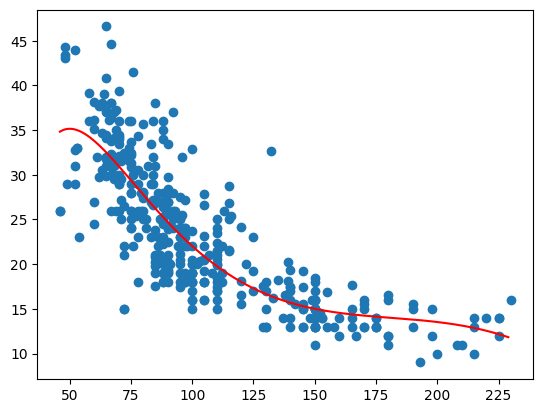

In [ ]:

data = np.arange(X["horsepower"].min(), X["horsepower"].max(), 1)
data = pd.DataFrame({"horsepower": data})
data = sm.add_constant(data)
data["horsepower_squared"] = data["horsepower"] ** 2
data["horsepower_log"] = np.log(data["horsepower"])
data["horsepower_root"] = np.sqrt(data["horsepower"])

y_hat = model_sqrt_log_root.predict(data)

fig, ax = plt.subplots()
ax.scatter(X["horsepower"], y)
ax.plot(data["horsepower"], y_hat, color="red")

## ejercicio 10

In [ ]:
carseats = load_data("Carseats")

In [ ]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [ ]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### verificando variables cualitativas

In [ ]:
quali = ["ShelveLoc", "Urban", "US"]
carseats[quali]


,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


In [ ]:
# shelveloc
carseats.ShelveLoc.value_counts()

,count
ShelveLoc,
Medium,219
Bad,96
Good,85


In [ ]:
carseats = pd.get_dummies(carseats, columns=["ShelveLoc"], drop_first=True)

In [ ]:
carseats.Urban.value_counts()

,count
Urban,
Yes,282
No,118


In [ ]:
carseats.Urban = carseats.Urban.map({"No": 0, "Yes": 1})

In [ ]:
carseats.US.value_counts()

,count
US,
Yes,258
No,142


In [ ]:
carseats.US = carseats.US.map({"No": 0, "Yes": 1})

In [ ]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,False,False
1,11.22,111,48,16,260,83,65,10,1,1,True,False
2,10.06,113,35,10,269,80,59,12,1,1,False,True
3,7.40,117,100,4,466,97,55,14,1,1,False,True
4,4.15,141,64,3,340,128,38,13,1,0,False,False


In [ ]:
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Urban', 'US', 'ShelveLoc_Good',
       'ShelveLoc_Medium'],
      dtype='object')

In [ ]:
quali = ['Urban', 'US', 'ShelveLoc_Good', 'ShelveLoc_Medium']
carseats[quali] = carseats[quali].astype(float)


In [ ]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1.0,1.0,0.0,0.0
1,11.22,111,48,16,260,83,65,10,1.0,1.0,1.0,0.0
2,10.06,113,35,10,269,80,59,12,1.0,1.0,0.0,1.0
3,7.40,117,100,4,466,97,55,14,1.0,1.0,0.0,1.0
4,4.15,141,64,3,340,128,38,13,1.0,0.0,0.0,0.0


<Axes: ylabel='Price'>

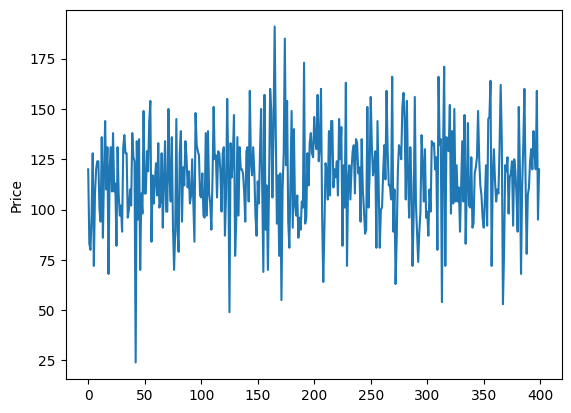

In [ ]:
import seaborn as sns
sns.lineplot(carseats.Price)

<Axes: xlabel='Price', ylabel='Sales'>

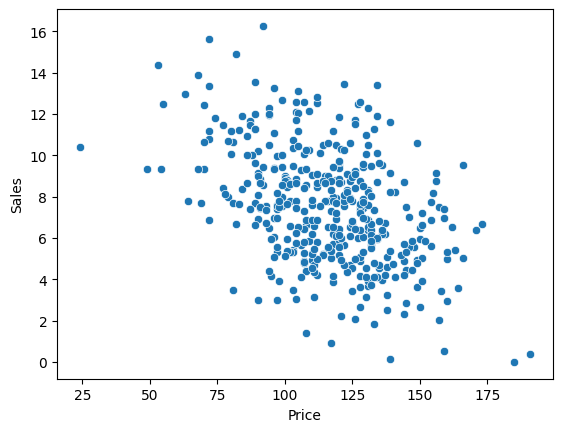

In [ ]:
sns.scatterplot(data=carseats, x="Price", y="Sales")

<Axes: xlabel='Urban', ylabel='Sales'>

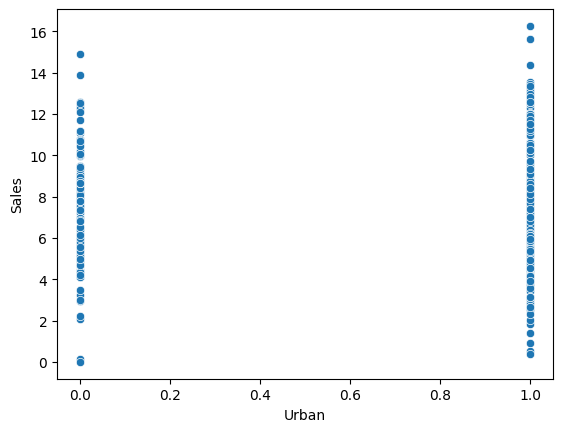

In [ ]:
sns.scatterplot(data=carseats, x="Urban", y="Sales")

In [ ]:
carseats.query("Urban == 1")["Income"].mean()

np.float64(69.34397163120568)

In [ ]:
carseats.query("Urban == 0")["Income"].mean()

np.float64(67.01694915254237)

In [ ]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000,0.212500,0.547500
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113,0.409589,0.498362
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000,0.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000,0.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   Urban             400 non-null    float64
 9   US                400 non-null    float64
 10  ShelveLoc_Good    400 non-null    float64
 11  ShelveLoc_Medium  400 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 37.6 KB


### a) Modelo multiple (sales ~ price, urban, US)

In [ ]:
# data
X = carseats[["Price", "Urban", "US"]]
y = carseats["Sales"]

In [ ]:
X = sm.add_constant(X)

In [ ]:
# modelo
modelo_1 =sm.OLS(y, X).fit()
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.39e-23
Time:                        22:11:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

### b) provide an interpretation

Las ventas tienen en promedio un valor de 13.045unidades mioentras que por cada incremento de 1 en el precio, las ventas se reducen en un 0.05, lo cual es factible y real en la teoria.

Las ventas tienen una reduccion de -0.02 por cada unidad de Urban que dicen que si estan en zona urbnana. Sin embargo en caso digan que no, tendran un mejor valor de ventas. Pero esta variable no es significativa estadisticamente para el modelo.

En el caso de US, en caso sea un yes las ventas se incrementaran en 1.2 unidades por cada incremento en us. Esta relacion si es muy importante porque es significativa estadisticamente

### c)

El modelo sigue la siguiente ecuacion de regresion:
$$\hat{sales}=\beta_0 - \beta_1\times Price - \beta_2\times Urban + \beta_3\times US $$

### d)

no rechazamos la hipotesis nula en el caso de la variable $$Urban$$ debido a que su p-value mayor a nuestro nivel de significancia de 5%

### e) Eliminando la variable urban

In [ ]:
X_2 = X.drop("Urban", axis=1)

In [ ]:
X_2

,const,Price,US
0,1.0,120,1.0
1,1.0,83,1.0
2,1.0,80,1.0
3,1.0,97,1.0
4,1.0,128,0.0
...,...,...,...
395,1.0,128,1.0
396,1.0,120,1.0
397,1.0,159,1.0
398,1.0,95,1.0


In [ ]:
modelo_2 = sm.OLS(y, X_2).fit()
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.66e-24
Time:                        22:28:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

In [ ]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.39e-23
Time:                        22:29:31   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

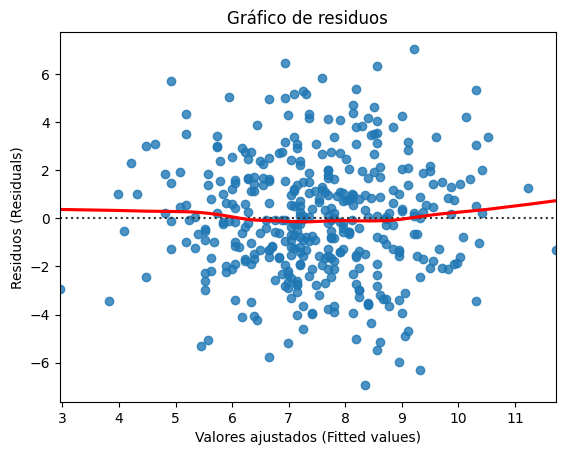

In [ ]:
sns.residplot(x=modelo_2.fittedvalues, y=modelo_2.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores ajustados (Fitted values)")
plt.ylabel("Residuos (Residuals)")
plt.title("Gráfico de residuos")
plt.show()

### f)

Ambos modelos tienen un R2 muy parecido solo diferenciado por una milesima, sin embargo modelo_2 es mejor debido a que logra un r2 similar con menos variables regresoras.

### g)

In [ ]:
# hallando al 95% lo que es 2 Desviaciones estandar del b1.
modelo_2.params

,0
const,13.030793
Price,-0.054478
US,1.199643


In [ ]:
modelo_2.conf_int(.05)

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


### h)

In [ ]:
influence = modelo_2.get_influence()

In [ ]:
standardized_residuals = influence.resid_studentized_internal

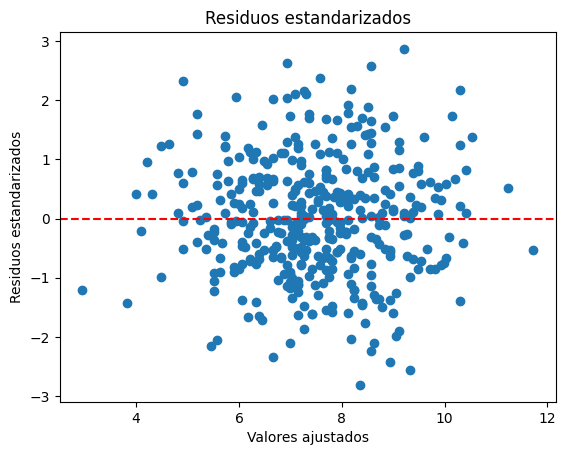

In [ ]:
plt.scatter(modelo_2.fittedvalues, standardized_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos estandarizados")
plt.title("Residuos estandarizados")
plt.show()

## Ejercicio 11

In [ ]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

### a)

In [ ]:
model_11_1 = sm.OLS(y, x).fit()
print(model_11_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 12 Nov 2025   Prob (F-statistic):                    6.23e-31
Time:                        00:37:37   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### b)

In [ ]:
model_11_2 = sm.OLS(x,y).fit()
print(model_11_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 12 Nov 2025   Prob (F-statistic):                    6.23e-31
Time:                        00:38:09   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Ejercicio 12


#### a)

Cuando la varianiza de ambos es similar o el conjunto de datos de uno es la permutacion del otro.

#### b)

In [ ]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

<Axes: >

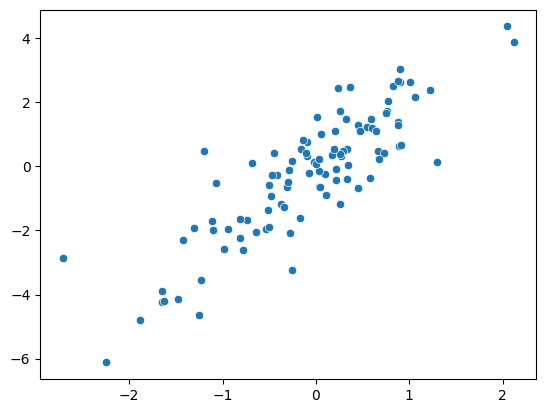

In [ ]:
import seaborn as sns
sns.scatterplot(x=x, y=y)

##### modelo

In [ ]:
model_12_1 = sm.OLS(y, x).fit()
print(model_12_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                    6.23e-31
Time:                        00:40:20   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
modelo_12_2 = sm.OLS(x, y).fit()
print(modelo_12_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                    6.23e-31
Time:                        00:40:34   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### c)

In [ ]:
y = np.random.permutation(x)

In [ ]:
modelo_12_3 = sm.OLS(y, x).fit()
print(modelo_12_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                            0.02085
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                       0.885
Time:                        00:41:39   Log-Likelihood:                         -126.19
No. Observations:                 100   AIC:                                      254.4
Df Residuals:                      99   BIC:                                      257.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
modelo_12_4 = sm.OLS(x, y).fit()
print(modelo_12_4.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                            0.02085
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                       0.885
Time:                        00:41:52   Log-Likelihood:                         -126.19
No. Observations:                 100   AIC:                                      254.4
Df Residuals:                      99   BIC:                                      257.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Ejercicio 13

### a)

<Axes: ylabel='Count'>

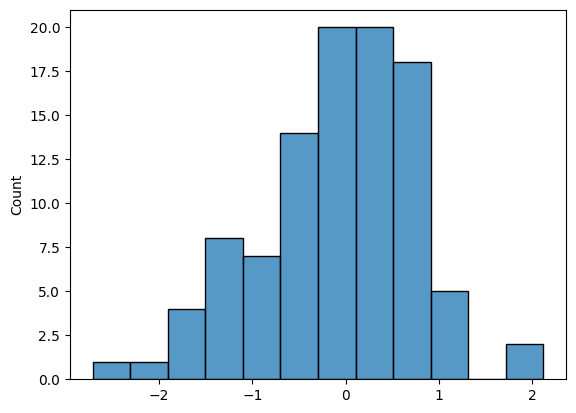

In [3]:
import seaborn as sns
rng = np.random.default_rng(1)
x = rng.normal(loc=0, scale=1, size=100)
sns.histplot(x)

### b)

<Axes: ylabel='Count'>

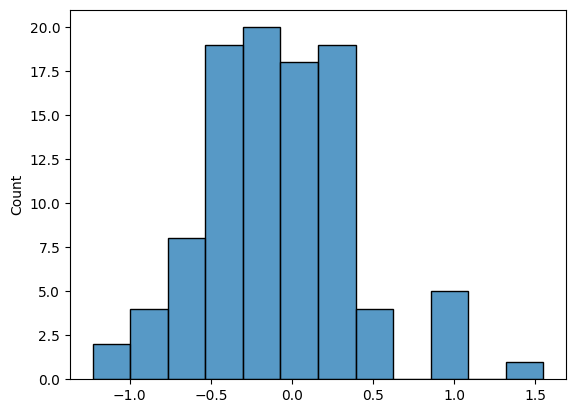

In [ ]:
eps = rng.normal(loc=0, scale=np.sqrt(0.25), size=100)
sns.histplot(eps)

### c)
$$Y = -1 + 0.5X+ϵ$$

<Axes: ylabel='Count'>

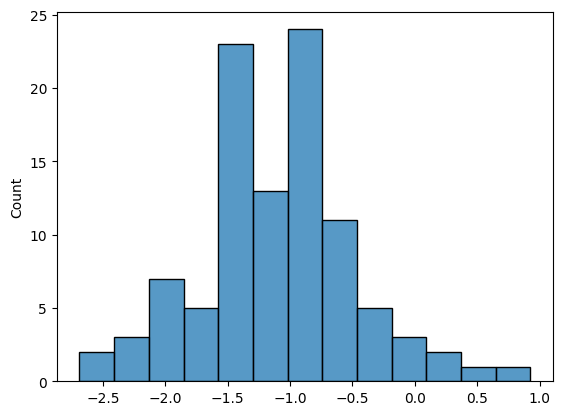

In [ ]:
# genenrando la data
y = -1 + 0.5 * x + eps
sns.histplot(y)

EL largo del vector y es 100

en el mdelo el valor de :

$$\beta_0 = -1 $$
$$\beta_1= 0.5$$

### d)

<Axes: >

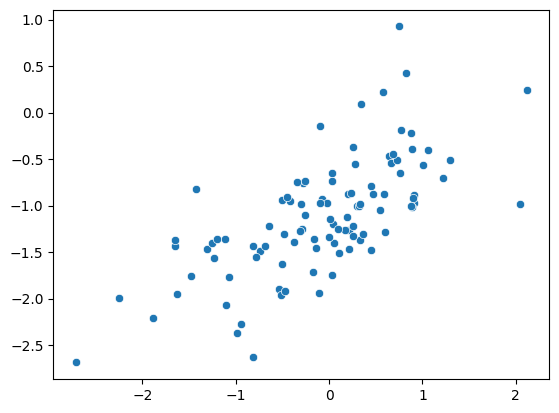

In [ ]:
sns.scatterplot(x=x[:, 1], y=y)

### e)

In [ ]:
# modelo 13
x = sm.add_constant(x)
modelo_1 = sm.OLS(y, x).fit()
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     83.08
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.01e-14
Time:                        01:13:22   Log-Likelihood:                -63.481
No. Observations:                 100   AIC:                             131.0
Df Residuals:                      98   BIC:                             136.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0810      0.046    -23.353      0.0

EL largo del vector y es 100

en el mdelo el valor de :

$$\beta_0 = -1.0810$$
$$\beta_1= 0.4936$$

### f)

In [11]:
def line(ax, b0, b1, **kwargs):
  start = ax.get_xlim()
  end = [b0 + start[0] * b1, b0 + start[1] * b1]
  ax.plot(start, end, **kwargs)

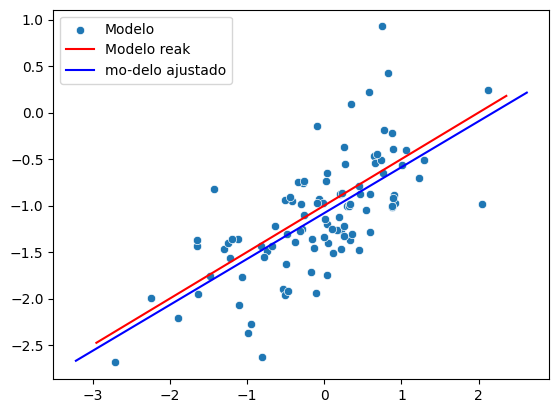

In [ ]:
import matplotlib.pyplot as plt
b0 = -1
b1 = 0.5
b0_hat = modelo_1.params[0]
b1_hat = modelo_1.params[1]
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x[:, 1], y=y)
line(ax, b0, b1, color="red")
line(ax, b0_hat, b1_hat, color="blue")
legend = ax.legend(["Modelo", "Modelo reak", "mo-delo ajustado"])


podemos apreciar que el modelo pese a tener un bajo r2 es muy bueno para puntos diferentes al de testeo, esto es debido a que la relacion es lineal. los paramtros se acercan mucho a los reales.

### g)

In [ ]:
# modelo polinomial con x2
X = pd.DataFrame({"x": x[:, 1], "x2": x[:, 1] ** 2})
X

,x,x2
0,0.345584,0.119428
1,0.821618,0.675056
2,0.330437,0.109189
3,-1.303157,1.698219
4,0.905356,0.819669
...,...,...
95,-2.250854,5.066345
96,-0.138655,0.019225
97,0.033000,0.001089
98,-1.425349,2.031620


In [ ]:
X = sm.add_constant(X)


In [ ]:

modelo_2 = sm.OLS(y, X).fit()
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     41.12
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.16e-13
Time:                        01:46:46   Log-Likelihood:                -63.477
No. Observations:                 100   AIC:                             133.0
Df Residuals:                      97   BIC:                             140.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0836      0.055    -19.758      0.0

El modelo le dio una ponderacion muy baja al x2 debido a que no es relevante para explicar la relacion. es por eso que el valor de b0 y b1 permanecen muy parecido al modelo1.

### h)"

In [7]:
x = rng.normal(loc=0, scale=1, size=100)
eps = rng.normal(loc=0, scale=np.sqrt(0.02), size=100)
y = -1 + 0.5*x + eps

<Axes: >

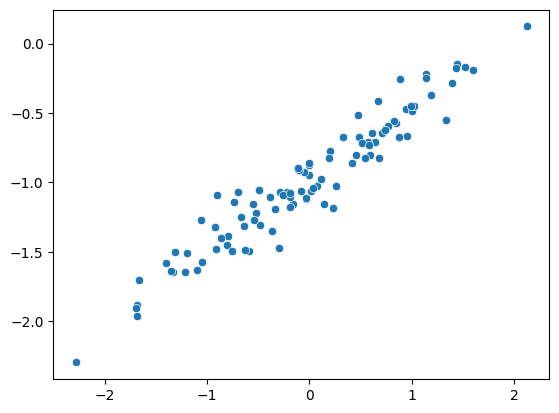

In [8]:

sns.scatterplot(x=x, y=y)


In [9]:
# modelo
x = sm.add_constant(x)
modelo_3 = sm.OLS(y, x).fit()
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1164.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           3.44e-56
Time:                        21:13:14   Log-Likelihood:                 64.182
No. Observations:                 100   AIC:                            -124.4
Df Residuals:                      98   BIC:                            -119.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9788      0.013    -76.060      0.0

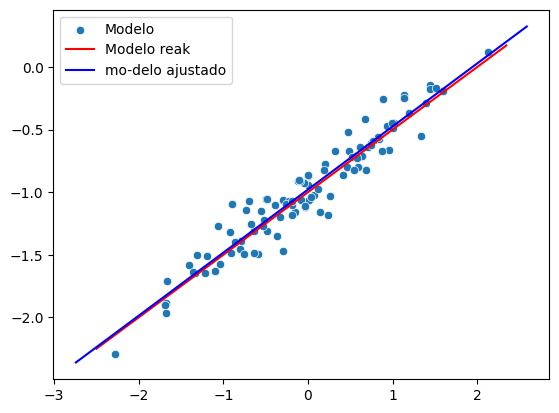

In [12]:
b0 = -1
b1 = 0.5
b0_hat = modelo_3.params[0]
b1_hat = modelo_3.params[1]
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x[:, 1], y=y)
line(ax, b0, b1, color="red")
line(ax, b0_hat, b1_hat, color="blue")
legend = ax.legend(["Modelo", "Modelo reak", "mo-delo ajustado"])

Cuando menor es el noise, podemos decir que la recta se ajsuta meujor a los datos estando muy parecida a la recta real.

### i)

In [20]:
x = rng.normal(loc=0, scale=1, size=100)
eps = rng.normal(loc=0, scale=np.sqrt(2), size=100)
y = -1 + 0.5*x + eps

<Axes: >

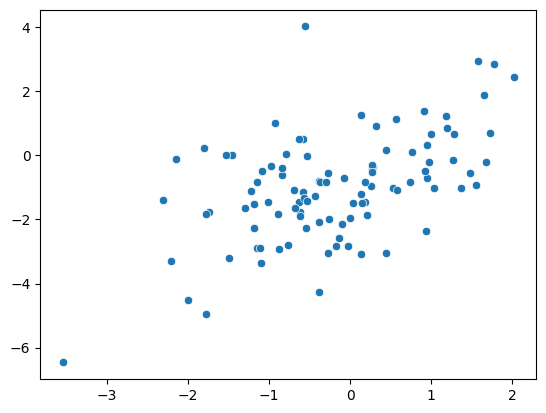

In [21]:
sns.scatterplot(x=x, y=y)

In [22]:
#modelo
x = sm.add_constant(x)
modelo_4 = sm.OLS(y, x).fit()
print(modelo_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.64
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           8.64e-09
Time:                        21:14:21   Log-Likelihood:                -175.23
No. Observations:                 100   AIC:                             354.5
Df Residuals:                      98   BIC:                             359.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8337      0.143     -5.821      0.0

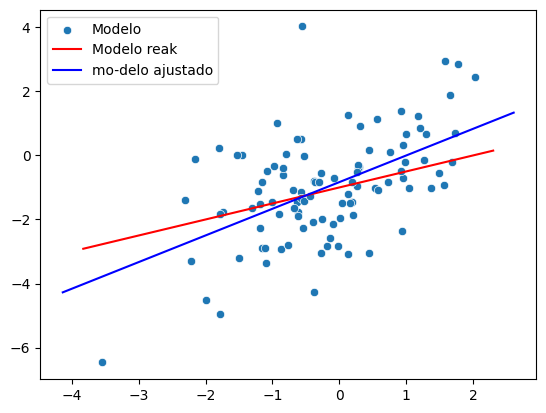

In [23]:
b0 = -1
b1 = 0.5
b0_hat = modelo_4.params[0]
b1_hat = modelo_4.params[1]
fig, ax = plt.subplots()
ax = sns.scatterplot(x=x[:, 1], y=y)
line(ax, b0, b1, color="red")
line(ax, b0_hat, b1_hat, color="blue")
legend = ax.legend(["Modelo", "Modelo reak", "mo-delo ajustado"])

### j)

In [25]:
print(modelo_3.conf_int(.05))

[[-1.0043075  -0.95323375]
 [ 0.47435639  0.53294001]]


In [26]:
print(modelo_4.conf_int(.05))

[[-1.11797501 -0.54950681]
 [ 0.57001705  1.09471698]]


Dado que los reales son -1 y 0.5 podemos decir que ambos modelos tienen dentro el valor verdadero de los valores reales para las beetas.

## Ejercicio 14

### a)

In [110]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

In [111]:
data = pd.DataFrame({"x1": x1, "x2": x2, "y": y})
data

,x1,x2,y
0,0.956002,0.469359,4.356977
1,0.207682,0.142509,3.677789
2,0.828445,0.587699,3.482079
3,0.149282,0.181141,2.369093
4,0.512805,0.236458,1.413295
...,...,...,...
95,0.427256,0.273142,3.940722
96,0.790513,0.456659,3.460998
97,0.531602,0.236308,3.355095
98,0.013037,0.054343,2.336922


### b)

In [112]:
data.corr()

,x1,x2,y
x1,1.000000,0.772324,0.530531
x2,0.772324,1.000000,0.471356
y,0.530531,0.471356,1.000000


<Axes: >

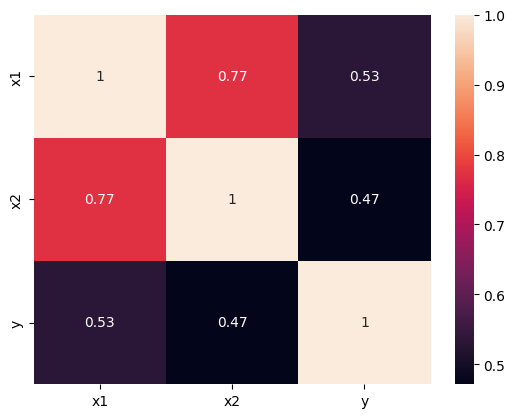

In [113]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

<Axes: xlabel='x1', ylabel='x2'>

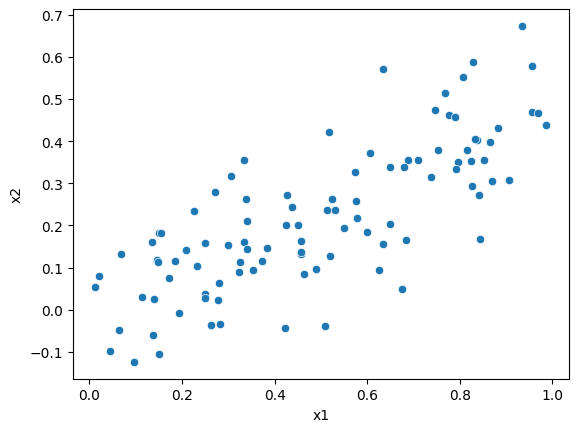

In [114]:
sns.scatterplot(data=data, x="x1", y="x2")

### c)

In [73]:
# modelo 1
X = data[["x1", "x2"]]
X = sm.add_constant(X)

y = data["y"]

modelo_1 = sm.OLS(y, X).fit()
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     23.47
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           4.86e-09
Time:                        23:27:08   Log-Likelihood:                -133.23
No. Observations:                 100   AIC:                             272.5
Df Residuals:                      97   BIC:                             280.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7934      0.191      9.399      0.0

In [74]:
# tenemos los siguientes valores para los parametros de regresion:
modelo_1.params

,0
const,1.793445
x1,2.168099
x2,0.107506


In [75]:
# tenemos que los valores verdaderos para cada beta es :
b0 = 2
b1 = 2
b2 = 0.3

In [76]:
modelo_1.conf_int(.05)

,0,1
const,1.414743,2.172147
x1,1.029707,3.306490
x2,-1.763192,1.978204


Podemos decir que estan relacionados y que sus valores son cercanos a los reales.

### d)

In [77]:
# modelo 2 Usando solo x1
X = data[["x1"]]
X = sm.add_constant(X)

y = data["y"]

In [42]:
modelo_2 = sm.OLS(y, X).fit()
print(modelo_2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     68.55
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           6.40e-13
Time:                        21:42:08   Log-Likelihood:                -133.23
No. Observations:                 100   AIC:                             270.5
Df Residuals:                      98   BIC:                             275.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9427      0.190     10.239      0.0

con un P-value de 0.000 podemos decir que se rechaza la H0 y x1 si es significativo estadisticamente para el modelo.

### e)


In [43]:
# modelo 3
X = data['x2']
X = sm.add_constant(X)

y = data["y"]

In [44]:
modelo_3 = sm.OLS(y, X).fit()
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     65.79
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.47e-12
Time:                        21:44:36   Log-Likelihood:                -134.07
No. Observations:                 100   AIC:                             272.1
Df Residuals:                      98   BIC:                             277.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3381      0.261      5.130      0.0

En este caso rechazamos H0 debido a que p-value es < 0.05

### g)

In [115]:
data
new_point = {"x1": [0.1], "x2": [0.8], "y": [6]}
new_point = pd.DataFrame(new_point)

In [116]:
data = pd.concat([data, new_point], ignore_index=True)


In [117]:
data

,x1,x2,y
0,0.956002,0.469359,4.356977
1,0.207682,0.142509,3.677789
2,0.828445,0.587699,3.482079
3,0.149282,0.181141,2.369093
4,0.512805,0.236458,1.413295
...,...,...,...
96,0.790513,0.456659,3.460998
97,0.531602,0.236308,3.355095
98,0.013037,0.054343,2.336922
99,0.019875,0.079619,4.566538


In [118]:
# hallando modelos:
X = data[["x1", "x2"]]
X = sm.add_constant(X)

y = data["y"]

modelo_5 = sm.OLS(y, X).fit()
print(modelo_5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           4.60e-08
Time:                        23:55:18   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

In [119]:
# solo con x1
X = data[["x1"]]
X = sm.add_constant(X)

y = data["y"]

modelo_6 = sm.OLS(y, X).fit()
print(modelo_6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           9.23e-07
Time:                        23:55:22   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.0

In [120]:
# solo con x2
X = data["x2"]
X = sm.add_constant(X)

y = data["y"]

modelo_7 = sm.OLS(y, X).fit()
print(modelo_7.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           3.13e-08
Time:                        23:55:23   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.0

In [121]:
data

,x1,x2,y
0,0.956002,0.469359,4.356977
1,0.207682,0.142509,3.677789
2,0.828445,0.587699,3.482079
3,0.149282,0.181141,2.369093
4,0.512805,0.236458,1.413295
...,...,...,...
96,0.790513,0.456659,3.460998
97,0.531602,0.236308,3.355095
98,0.013037,0.054343,2.336922
99,0.019875,0.079619,4.566538


#### High leverage

<Axes: xlabel='x1', ylabel='x2'>

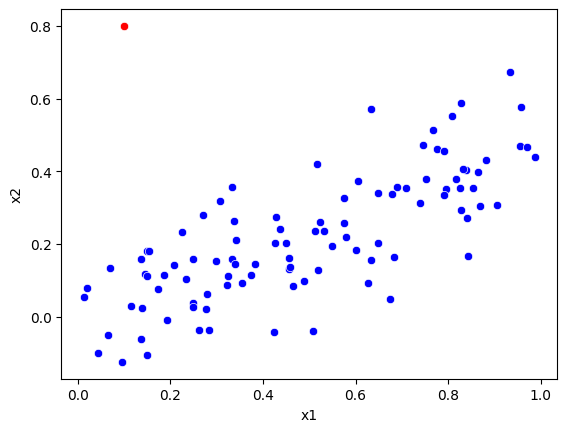

In [122]:
# grafico scater x1 y x2
sns.scatterplot(x=data["x1"].iloc[:100], y=data["x2"].iloc[:100], color="blue")
sns.scatterplot(x=data["x1"].iloc[100:], y=data["x2"].iloc[100:], color="red")



Esta punto nuevo agregado resulta un tanto raro segun vemos en el scatter plot. SObre todo por que su par esta alejado de los demas, no sigue la tendencia

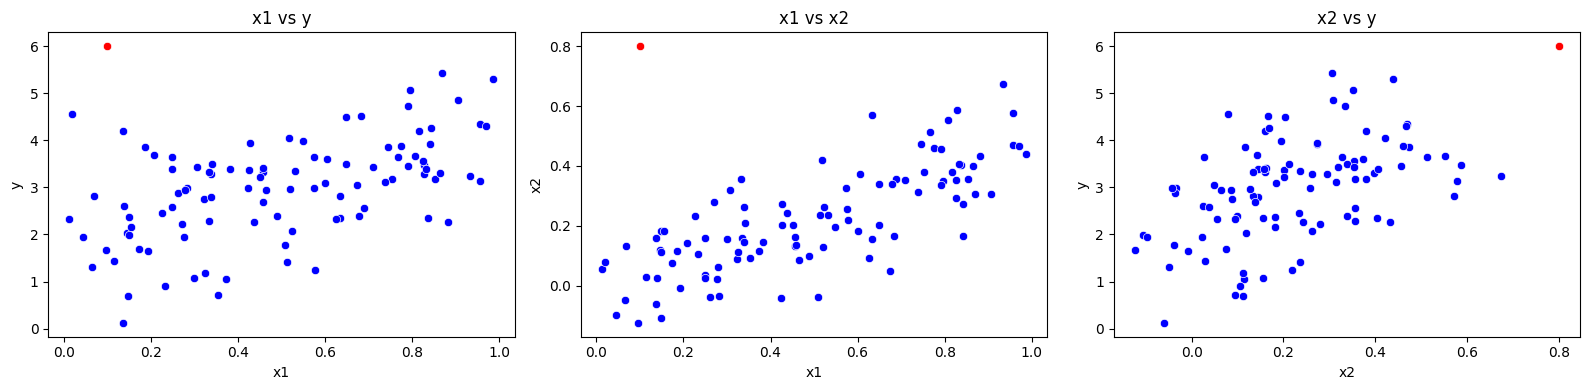

In [124]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

# --- Primer gráfico: x1 vs y ---
sns.scatterplot(
    x=data["x1"].iloc[:100],
    y=data["y"].iloc[:100],
    color="blue",
    ax=ax[0]
)

sns.scatterplot(
    x=data["x1"].iloc[100:],
    y=data["y"].iloc[100:],
    color="red",
    ax=ax[0]
)

ax[0].set_title("x1 vs y")

# --- Segundo gráfico: x1 vs x2 ---
sns.scatterplot(
    x=data["x1"].iloc[:100],
    y=data["x2"].iloc[:100],
    color="blue",
    ax=ax[1]
)

sns.scatterplot(
    x=data["x1"].iloc[100:],
    y=data["x2"].iloc[100:],
    color="red",
    ax=ax[1]
)

ax[1].set_title("x1 vs x2")

# --- Tercer gráfico: x2 vs y ---
sns.scatterplot(
    x=data["x2"].iloc[:100],
    y=data["y"].iloc[:100],
    color="blue",
    ax=ax[2]
)

sns.scatterplot(
    x=data["x2"].iloc[100:],
    y=data["y"].iloc[100:],
    color="red",
    ax=ax[2]
)
ax[2].set_title("x2 vs y")

plt.tight_layout()
plt.show()


Segun los graficos podemos decir que estos puntos en el caso de los predictores es un punto alejado de la tendencia normal podria tomarse en cuenta como un hgigh leveragae point.

Por otro lado, tenemos el caso de x2 el cual esta un tanto alejado de los valores normales de este mismo por lo que puede tomarse como un outlier.

Para el caso de Y no esta tan alejado de los valores normales de esta variable.



## Ejercicio 15

In [5]:
boston = load_data("Boston")

In [6]:
boston.head(-5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5


In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [8]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
# rad y dis
boston[["rad", "dis"]]

,rad,dis
0,1,4.0900
1,2,4.9671
2,2,4.9671
3,3,6.0622
4,3,6.0622
...,...,...
501,1,2.4786
502,1,2.2875
503,1,2.1675
504,1,2.3889


In [10]:
boston["rad"].value_counts()

,count
rad,
24,132
5,115
4,110
3,38
6,26
8,24
2,24
1,20
7,17


In [134]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<Axes: >

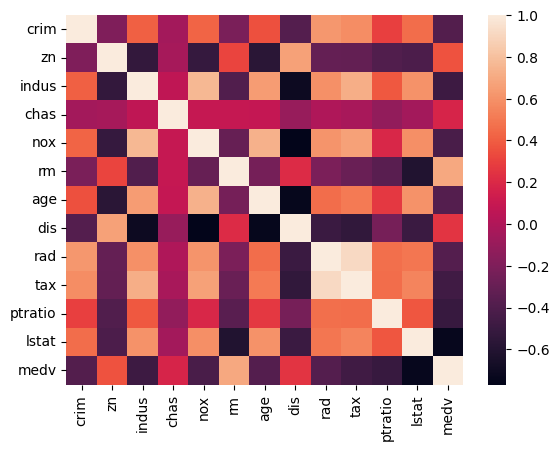

In [137]:
sns.heatmap(boston.corr(), annot=False)

### a)

In [30]:
good_models = []
columns = boston.drop("crim", axis=1).columns
for col in columns:
  X = boston[col]
  y = boston["crim"]

  X = sm.add_constant(X)

  model = sm.OLS(y, X).fit()
  if model.pvalues.iloc[1] < 0.05:
    good_models.append((col, model))


In [43]:
df = pd.DataFrame(
    {
        "col": [c for c, _ in good_models],
        "r2": [model.rsquared for _, model in good_models],
        "p-value": [model.pvalues.iloc[1] for _, model in good_models]
    }
)

In [45]:
df

,col,r2,p-value
0,zn,0.040188,5.506472e-06
1,indus,0.165310,1.450349e-21
2,nox,0.177217,3.751739e-23
3,rm,0.048069,6.346703e-07
4,age,0.124421,2.854869e-16
5,dis,0.144149,8.519949e-19
6,rad,0.391257,2.693844e-56
7,tax,0.339614,2.357127e-47
8,ptratio,0.084068,2.942922e-11
9,lstat,0.207591,2.654277e-27


In [66]:
def line(ax, slope, intercept, **kwargs):
  xlim = ax.get_xlim()
  ylim = [slope * xlim[0] + intercept, slope * xlim[1] + intercept]
  ax.plot(xlim, ylim, **kwargs)

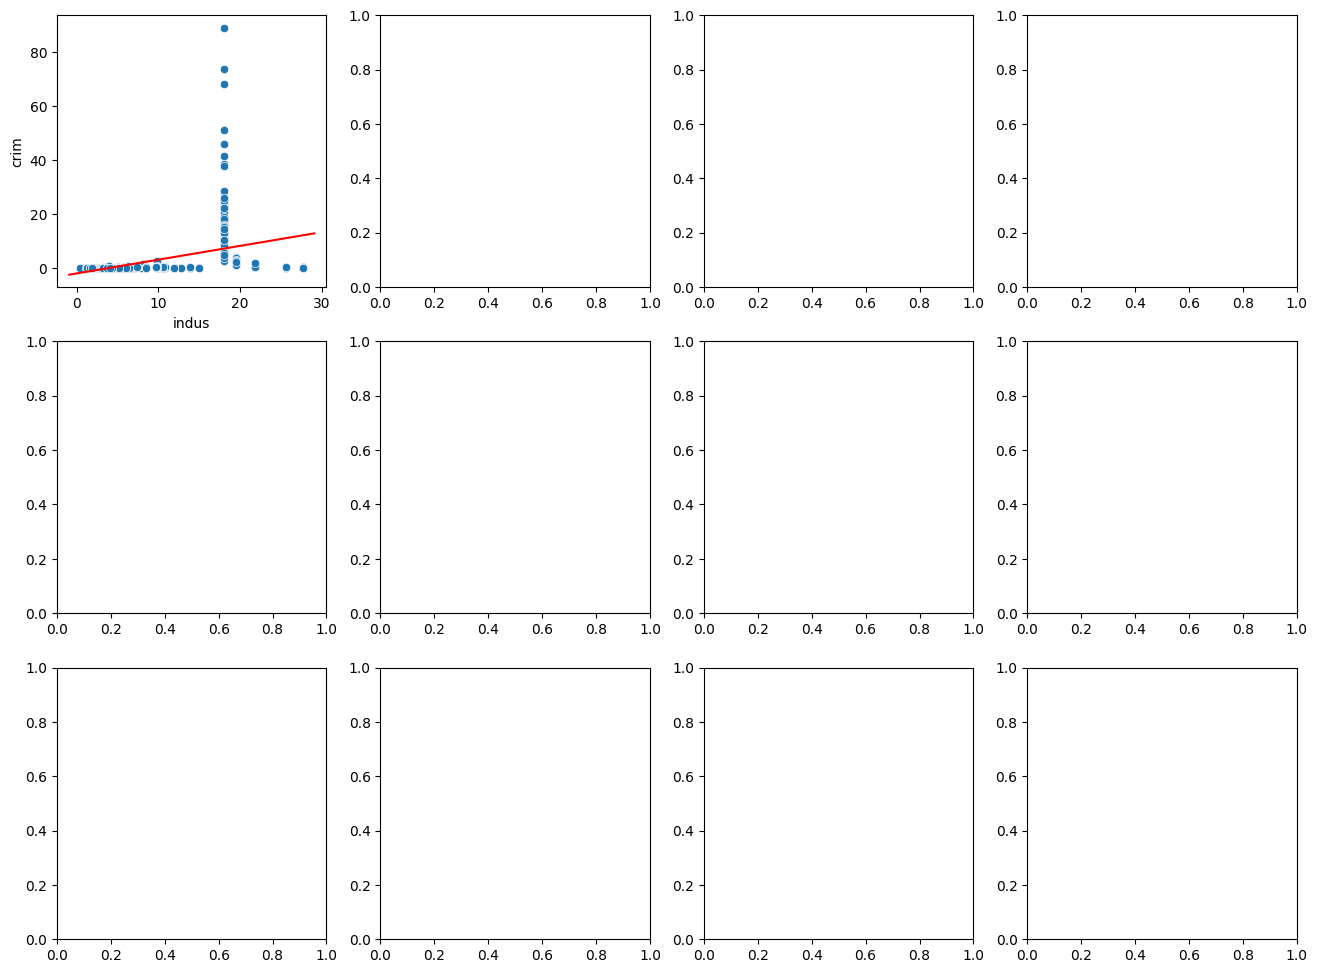

In [67]:
good_models[1][1]. params
fig, ax = plt.subplots(3,4, figsize=(16, 12))
sns.scatterplot(data=boston, x=good_models[1][0], y="crim", ax=ax[0, 0])
line(ax[0, 0], good_models[1][1].params.iloc[1], good_models[1][1].params.iloc[0],
     color="red")


In [63]:
good_models[0][1].params.iloc[1]

np.float64(-0.07393497740412348)

<Axes: xlabel='rad', ylabel='lstat'>

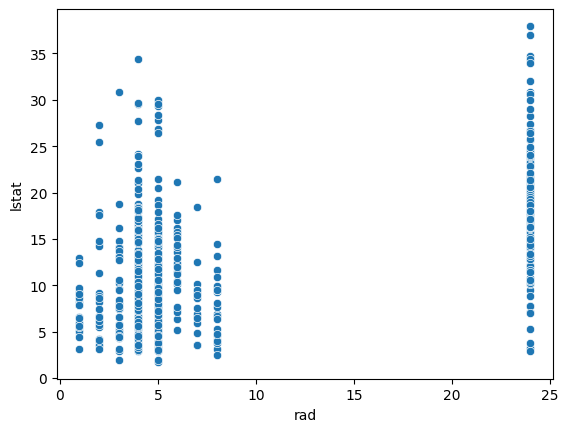

In [38]:
import seaborn as sns
X = boston["rad"]
y = boston["lstat"]
sns.scatterplot(x=X, y=y)

In [17]:
X = sm.add_constant(X)

In [18]:
# model 1
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           1.17e-19
Time:                        02:07:40   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7965      0.934     12.628      0.0

In [24]:
model_1.pvalues.iloc[1]

np.float64(1.1739870821943694e-19)

In [25]:
model_1.pvalues

,0
const,5.934119e-32
medv,1.173987e-19
